# Graded Challenge 7

## Nama  : Irvandhi Stanly Winata
## Batch : HCK - 013

**Objective and Background**


This project aims to develop a convolutional neural network (CNN) model to predict various types of vegetables based on input images. Initially, the dataset will be loaded right away as train, validation, and test set and the data will undergo exploratory data analysis, encompassing visualizations and the characteristics of the images. Subsequently, a CNN model architecture will be constructed, incorporating convolutional layers, pooling layers, and fully connected layers, with default parameters and no feature engineering as the base model. The models will be trained and evaluated using metrics such as accuracy and loss. After that, the model  will be improved to optimize model performance thorugh the addition of feature engineering, as well as addition of batch normalizer and dropout layers within the model. Finally, the trained CNN model will be deployed for inference, allowing users to input images of vegetables for prediction, potentially through integration with Hugging Face for deployment.

===========================================================================================================================

# Importing Necessary Libraries
Before we start the analysis, we have to import the necessary packages and libraries to assist our machine learning model creation.

In [1]:
## data manipulation 
import numpy as np
import pandas as pd
from PIL import Image
from PIL.ExifTags import TAGS
import random

## plotting
import matplotlib.pyplot as plt
import seaborn as sns

## nueral network creation
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential,Model
from keras.preprocessing import image

## pre-trained model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Evalution metrics
from sklearn.metrics import classification_report 

import os
import warnings
warnings.filterwarnings('ignore')

# Data Loading

The dataset containing the vegetable images was obtained from Kaggle (Source: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset/data). The data was downloaded and the image files are sucessfully loaded into this notebook. The original dataset was already splitted into train, validation, dan test sets. Therefore, we will represent each path in different variables respectively and __we do not have to conduct splitting.__

In [2]:
train_path = "Vegetable Images/train"
test_path = "Vegetable Images/test"
val_path = "Vegetable Images/validation"
image_categories = os.listdir('Vegetable Images/train')

Firstly, the data for training is prepared. The ImageDataGenerator is used to generate batches of image data with real-time data augmentation. The rescale parameter is set to normalize the pixel values of the images to the range [0, 1]. This normalization helps in stabilizing the training process and improving convergence. The images are loaded from a directory specified by train_path, and they are resized to a target size of 224x224 pixels. The batch_size parameter determines the number of images processed in each batch during training, which is set to 64 in this case. The class_mode parameter is set to 'categorical' since the data is multiclass.

Similarly, data for validation and testing is prepared. The ImageDataGenerator is again used with the same normalization (rescale) and directory paths. For validation and testing data, the shuffle parameter is set to False to ensure that the order of the data remains unchanged during evaluation.

For the first model, additional data augmentation was not conducted and will be treated as a part of model improvement.

In [9]:
print("Train Data: ",end=' ')
train_gen = ImageDataGenerator(
                rescale = 1./255,# Normalize the data
                )

train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(224, 224),
                                            batch_size=64,
                                            class_mode='categorical',
                                            )

print("Validation Data: ",end=' ')
val_gen = ImageDataGenerator(rescale=1./255) 
val_image_generator = val_gen.flow_from_directory(
                                            val_path,
                                            target_size=(224, 224),
                                            batch_size=64,
                                            class_mode='categorical',
                                            )
print("Test Data: ",end=' ')
test_gen = ImageDataGenerator(rescale=1./255)
test_image_generator = val_gen.flow_from_directory(
                                            test_path,
                                            target_size=(224, 224),
                                            batch_size=64,
                                            class_mode='categorical',
                                            shuffle = False
                                            )

Train Data:  Found 15000 images belonging to 15 classes.
Validation Data:  Found 3000 images belonging to 15 classes.
Test Data:  Found 3000 images belonging to 15 classes.


# EDA

## **Showing The Images Of Each Class + Their Special Characteristics**

The code below is intended to visualize a sample of images from different categories, which can be helpful for understanding the dataset and verifying data preprocessing steps. We can see that there are 15 different vegetable classes and the images are loaded successfully and they matched their respective labels

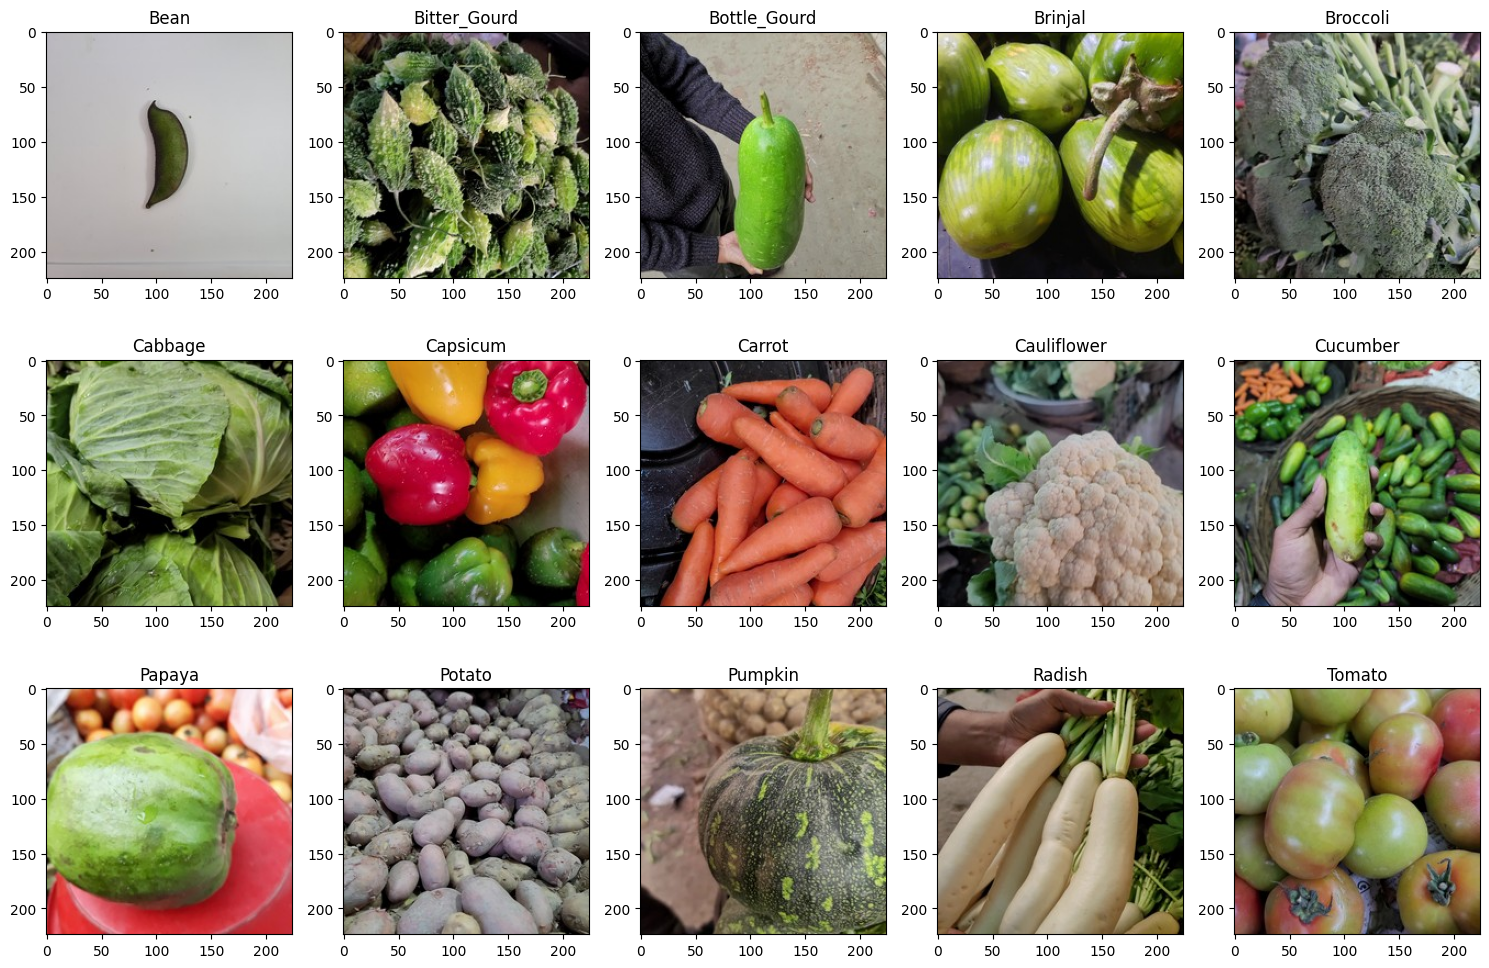

In [23]:
def plot_images(image_categories):
    '''
     Plot Each label Once
    '''
    # Create a figure
    plt.figure(1,figsize=(15, 10))
    for i, cat in enumerate(image_categories):
        
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[i]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255
        # Create Subplot and plot the images
        plt.subplot(3, 5, i+1)
        plt.title(cat)
        plt.imshow(img_arr)
        
    plt.tight_layout()

plot_images(image_categories)

Bean: Beans are elongated, slender pods with a smooth surface. They come in various shades of green, ranging from light lime to dark emerald, and sometimes feature subtle speckles or ridges along their length.

Bitter Gourd: Bitter gourd has a unique appearance characterized by its elongated, warty exterior and vibrant green color. The surface is often wrinkled and uneven, with distinct ridges running along its length.

Bottle Gourd: Bottle gourd has a smooth, elongated shape reminiscent of a large cucumber or squash. It features a pale green, glossy skin and can grow to impressive lengths, resembling a bottle or gourd.

Brinjal: Brinjal, or eggplant, varies in appearance depending on the variety. Common types include elongated, cylindrical shapes and bulbous, round varieties. They come in shades of white or green, with a glossy skin and often feature a slightly curved stem.

Broccoli: Broccoli is characterized by its dense clusters of small, tightly packed florets attached to a thick, fibrous stem. The florets range in color from deep green to bluish-green and form a distinctive, tree-like structure.

Cabbage: Cabbage has a round or oval shape with tightly packed leaves that form a dense, compact head. It comes in various colors, mostly vibrant green with a smooth, waxy texture and a slightly crinkled appearance.

Capsicum: Capsicum has a bell-like shape with four lobes and a thick, crunchy texture. It comes in a rainbow of colors, including red, yellow, orange, and green, with a glossy, smooth surface.

Carrot: Carrots are slender, tapering roots with a bright orange hue and a smooth, glossy surface. They feature a distinct conical shape, sometimes with a slight curvature.

Cauliflower: Cauliflower has a large, rounded head composed of tightly packed florets attached to a thick, sturdy stem. The florets are creamy-white in color and form a distinctive, fractal-like pattern when viewed from above.

Cucumber: Cucumbers are elongated, cylindrical fruits with a smooth, waxy skin and a bright green color. They feature subtle longitudinal ridges and are typically uniform in shape.

Papaya: Papayas are large, oblong fruits with a smooth, thin skin that ranges in color from green to yellow-orange as it ripens. They have a distinctive pear-like shape.

Potato: Potatoes are round or oblong tubers with a rough, textured skin that varies in color from pale yellow to deep brown. They feature shallow eyes and may have irregular shapes, depending on the variety.

Pumpkin: Pumpkins are large, round or oval-shaped fruits with a thick, ribbed exterior. They come in various shades of orange or green. Pumpkins have a smooth, glossy skin and are often adorned with a woody stem at the top.

Radish: Radishes are elongated root vegetables with a white skin. 

Tomato: Tomatoes are round or slightly flattened fruits with a smooth, shiny skin that ranges in color from vibrant red, yellow, or orange,  depending on the variety.

## **Plotting The Data's Balance**

We observed the number of samples within each class in the training set. It was observed that there are 1000 images within each class, and the data is perfectly balanced.

<Axes: >

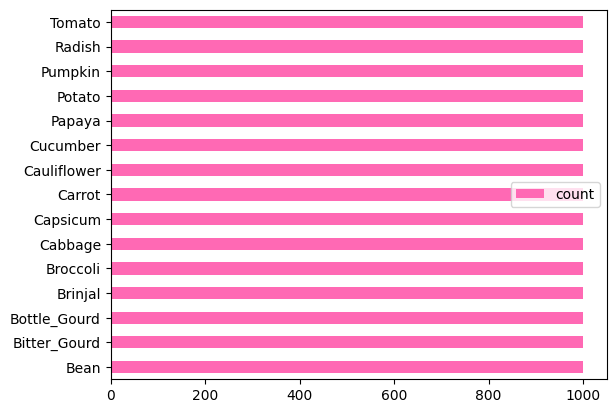

In [24]:
# Is The Dataset Balanced

images_length={}
for i, cat in enumerate(image_categories):
        
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        images_length[cat]=len(images_in_folder)
        
pd.DataFrame(images_length,index = ['count']).T.plot(kind='barh',color='hotpink')

## **Images In Pixel Form, Image Sizes, And Their Channel/Shape**

We want to prints out the images in pixel form along with their shapes. The `train_image_generator[0][0]` is used to access the pixel values of the images generated by the image data generator. The `shape` attribute of the pixel array provides information about the dimensions of the images. We can see that the shape of the first batch is (64, 224, 224, 3). 64 represent the number of images processed in each batch during training. two 224s represent the width and height of the individual image, which is 224x224 pixels. Lastly, the number 3 represent the color channel of the image, which is RGB (Red, Green, Blue) 


In [25]:
# Show images in pixel form

print('Images : ', train_image_generator[0][0])
print('Shape  : ', train_image_generator[0][0].shape)

Images :  [[[[0.3803922  0.29411766 0.34117648]
   [0.39607847 0.30980393 0.35686275]
   [0.38431376 0.29803923 0.34509805]
   ...
   [0.5803922  0.5764706  0.60784316]
   [0.6156863  0.5921569  0.6392157 ]
   [0.60784316 0.58431375 0.6313726 ]]

  [[0.38431376 0.29803923 0.34509805]
   [0.37647063 0.29803923 0.34117648]
   [0.36078432 0.27450982 0.32156864]
   ...
   [0.6392157  0.6392157  0.64705884]
   [0.6431373  0.63529414 0.654902  ]
   [0.69803923 0.6784314  0.7019608 ]]

  [[0.3254902  0.24705884 0.28235295]
   [0.3254902  0.25882354 0.2901961 ]
   [0.32156864 0.24313727 0.2784314 ]
   ...
   [0.43529415 0.43921572 0.40784317]
   [0.5019608  0.5019608  0.46274513]
   [0.53333336 0.53333336 0.49411768]]

  ...

  [[0.01568628 0.01176471 0.        ]
   [0.01176471 0.01568628 0.        ]
   [0.01960784 0.01568628 0.00784314]
   ...
   [0.14117648 0.14117648 0.13333334]
   [0.14117648 0.14117648 0.13333334]
   [0.15686275 0.15686275 0.14901961]]

  [[0.03529412 0.02352941 0.0039215

## **Images Orientation**

After that, we want to observe the angle at which a picture was taken, also known as the orientation or rotation angle. This can be done extracting the EXIF data from the image file. EXIF data often contains information about the orientation of the image when it was taken. It can be seen from the code below that overall, the orientation is '1', which means the orientation is Normal (0 degrees rotation). This is the default orientation where the image is displayed upright with the top of the image at the top of the viewing area.

In [26]:
def get_image_orientation(image_path):
    try:
        # Open the image file
        img = Image.open(image_path)
        
        # Extract EXIF data
        exif_data = img._getexif()
        
        # Search for the orientation tag (274)
        for tag, value in exif_data.items():
            if TAGS.get(tag) == 'Orientation':
                # Return the orientation value
                return value
    except (AttributeError, KeyError, IndexError):
        # If orientation information is not found or image has no EXIF data
        return None

def overall_orientation(main_folder):
    orientations = []
    # Iterate through all subfolders in the main folder
    for folder_name in os.listdir(main_folder):
        folder_path = os.path.join(main_folder, folder_name)
        # Check if the path is a directory
        if os.path.isdir(folder_path):
            # Iterate through all images in the subfolder
            for filename in os.listdir(folder_path):
                if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
                    # Get the image path
                    image_path = os.path.join(folder_path, filename)
                    # Get the orientation of the image
                    orientation = get_image_orientation(image_path)
                    if orientation:
                        orientations.append(orientation)
    
    # Check if the list of orientations is not empty
    if orientations:
        # Count the occurrences of each orientation value
        orientation_counts = {orientation: orientations.count(orientation) for orientation in set(orientations)}
        
        # Determine the most common orientation
        overall_orientation = max(orientation_counts, key=orientation_counts.get)
        
        return overall_orientation
    else:
        # Return None if no orientation information is found
        return None

# Example usage:
main_folder = "Vegetable Images/train"  # Replace with the path to your main folder
overall_orient = overall_orientation(main_folder)
if overall_orient:
    print("Overall Orientation:", overall_orient)
else:
    print("No orientation information found in the images.")


Overall Orientation: 1


# Base Model Architecture and Training

The model architecture used in this project used sequential API. We first initialize the sequential model, in which it is a linear stack of layers, where each layer has exactly one input tensor and one output tensor. Then we add convolutional (Conv2D) and max pooling (MaxPooling2D) layers to the model. The first convolutional layer has 32 filters of size 3x3, uses the ReLU activation function, and expects input images of size 224x224 pixels with 3 channels (RGB). On the other hand, the second convolutional layer has 64 filters of size 3x3, uses the ReLU activation function. The number of filter increased from the first to the second convolutional layer because the image size decreased with each convolutional layers. This increase is often done to capture more complex and abstract features in the input data as the network goes deeper into the architecture. Max pooling with a pool size of 2x2 is applied after each convolutional layer.

The flattening layer converts the 2D feature maps from the previous convolutional layers into a 1D feature vector, which can be input to a fully connected neural network. Then, we add fully connected (Dense) layers to the model. The first dense layer has 1024 units and uses the ReLU activation function. The second dense layer has 128 units with ReLU activation. The last dense layer or the output layer has 15 units, corresponding to the number of output classes, and uses the softmax activation function as we are dealing with multiclass predictions.

In [27]:
# Building the Model Architecture
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │   191,104,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191,256,527 (729.59 MB)

 Trainable params: 191,256,527 (729.59 MB)

 Non-trainable params: 0 (0.00 B)

As for the compiling and training, we use categorical cross entropy as the loss parameter as our label in this dataset is multiclass, which are 15 different classes of vegetables

In [28]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Training model
history = model.fit(train_image_generator, 
                 epochs=20, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch=15000//64, 
                 validation_steps=3000//64, 
)


Epoch 1/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - accuracy: 0.4081 - loss: 1.9011 - val_accuracy: 0.7921 - val_loss: 0.7137
Epoch 2/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7656 - loss: 0.4040 - val_accuracy: 0.6071 - val_loss: 0.5337
Epoch 3/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 299s 1s/step - accuracy: 0.8328 - loss: 0.5656 - val_accuracy: 0.8254 - val_loss: 0.5274
Epoch 4/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8906 - loss: 0.2161 - val_accuracy: 0.8214 - val_loss: 0.2785
Epoch 5/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 296s 1s/step - accuracy: 0.9039 - loss: 0.3280 - val_accuracy: 0.8570 - val_loss: 0.4733
Epoch 6/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8906 - loss: 0.1855 - val_accuracy: 0.9464 - val_loss: 0.1025
Epoch 7/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 297s 1s/step - accuracy: 0.9472 - loss: 0.2088 - val_accuracy: 0.9001 - val_loss: 0.3203
Epoch 8/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.0765 - val_accuracy

After training, we save the model beforehand so we do not have to re-train the model as it is very time and resource consuming.

In [30]:
model.save("model_base.keras")

We evaluate the model using model.evaluate to get the accuracy and loss for the training, validation, and test sets after training the model. Model.evaluate function computes the loss and any metrics specified during the model compilation on the provided data generator

Accuracy represents the proportion of correctly classified samples out of the total number of samples in the dataset. It's a measure of the model's predictive accuracy.

Loss represents a scalar value that indicates how well the model is performing. It's typically calculated as a measure of the difference between the predicted output and the actual target values. Lower values indicate better performance.

We can see from the result below, the model is still slightly overfitting with the training accuracy reaching 0.999 while the both the validation and test sets only reached 0.948 accuracy. The slight overfitting issue can also be obserbed in the visualization below, we can see there is a gap between training and validation loss at the last epoch.

In [18]:
results_train_func = model.evaluate(train_image_generator, verbose=0)
print('train_acc', results_train_func[1])
print('train_loss', results_train_func[0])

results_val_func = model.evaluate(val_image_generator, verbose=0)
print('val_acc', results_val_func[1])
print('val_loss', results_val_func[0])

results_test_func = model.evaluate(test_image_generator, verbose=0)
print('test_acc', results_test_func[1])
print('test_loss', results_test_func[0])

train_acc 0.9998666644096375
train_loss 0.007180741056799889
val_acc 0.9483333230018616
val_loss 0.1921425312757492
test_acc 0.9483333230018616
test_loss 0.1858188956975937


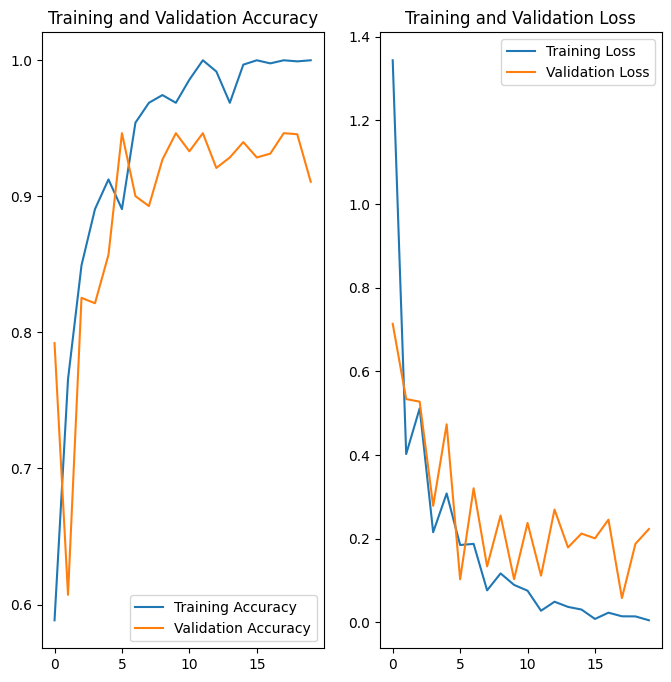

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Next, we will try to predict the test set with the model and create a classification report. From this report, we wil focus on __accuracy__ as in this project we are not focusing on either false positive or false negative of a certain class, and instead we just want to measure how accurate the model in predicting the type of vegetables. Our data is also perfectly balanced, making accuracy the best metric to use.

Similar to the result from the model.evaluate function, the test set accuracy is estimated to be 0.95.

In [33]:
class_names = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Get predictions from the model using the test image generator
predictions = model.predict(test_image_generator)

# Convert predictions from one-hot encoded format to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the test image generator
true_labels = test_image_generator.classes

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print the classification report
print(report)


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step
              precision    recall  f1-score   support

        Bean       0.92      0.95      0.93       200
Bitter_Gourd       0.98      0.95      0.96       200
Bottle_Gourd       0.97      0.96      0.97       200
     Brinjal       0.95      0.95      0.95       200
    Broccoli       0.88      0.94      0.91       200
     Cabbage       0.90      0.94      0.92       200
    Capsicum       0.98      0.98      0.98       200
      Carrot       0.99      1.00      1.00       200
 Cauliflower       0.90      0.90      0.90       200
    Cucumber       0.98      0.93      0.95       200
      Papaya       0.95      0.97      0.96       200
      Potato       0.99      0.96      0.97       200
     Pumpkin       0.94      0.92      0.93       200
      Radish       0.96      0.99      0.98       200
      Tomato       0.95      0.89      0.91       200

    accuracy                           0.95      3000
   macro avg       0.95      0.95      

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


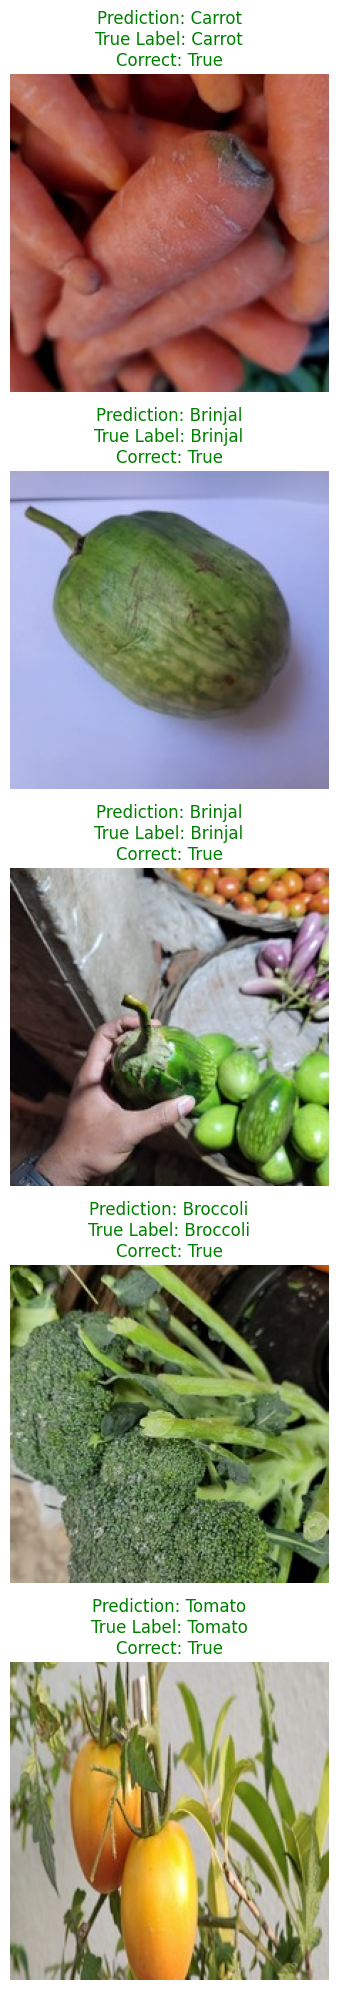

In [35]:
def predict_random(num_images=5):
    # Create subplots for displaying multiple images
    fig, axes = plt.subplots(num_images, 1, figsize=(6, 4*num_images))
    
    for i in range(num_images):
        # Randomly select a class from the available class names
        label = random.choice(class_names)

        # Get the path to the folder containing images for the selected class
        image_path = os.path.join(test_path, label)

        # Get a list of all images in the folder
        images_in_folder = os.listdir(image_path)

        # Randomly select an image from the list
        random_image = random.choice(images_in_folder)

        # Construct the full path to the randomly selected image
        image_path = os.path.join(image_path, random_image)

        # Load and preprocess the randomly selected image
        img_ = image.load_img(image_path, target_size=(224, 224))
        img_array = image.img_to_array(img_)
        img_processed = np.expand_dims(img_array, axis=0) 
        img_processed /= 255.   

        # Perform prediction using the model
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)
        predicted_label = class_names[index]

        # Check if prediction is correct
        is_correct = (predicted_label == label)
        
        # Display the image and prediction result
        ax = axes[i]
        ax.imshow(img_array)
        ax.set_title(f"Prediction: {predicted_label}\nTrue Label: {label}\nCorrect: {is_correct}", color='green' if is_correct else 'red')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

predict_random(num_images=5)


# Improved Model Architecture and Training

## Addition of Data Augmentation to The Base Model

Before we modify the model architecture, we will improve the model by adding data augmentation as feature engineering. Data augmentation is a technique commonly used in machine learning and computer vision tasks, especially in the context of training deep learning models on image data. It involves artificially increasing the size of a dataset by applying various transformations to the existing data. These transformations typically include rotations, translations, flips, changes in brightness or contrast, and other operations that preserve the semantic content of the image while altering its appearance slightly. Data augmentation expose the model to more data variations, making it more robust without adding more data directly

In this project, the augmentation parameters used are shear range, zoom range, and horizontal flip. Shear range controls the range within which shear transformations can be applied to the images during augmentation. Shear transformation involves shifting one part of the image in a fixed direction while keeping the other parts fixed. On the other hand, zoom range parameter controls the range of zooming applied to the images during augmentation. Zooming involves either magnifying or minifying the image, typically around its center. Lastly, Horizontal flipping involves flipping the image horizontally, effectively mirroring it along the vertical axis.


In [3]:
print("Train Data augmented: ",end=' ')
train_gen_augmented = ImageDataGenerator(
                  rescale = 1./255,# Normalise the data
                  shear_range = 0.2,
                  zoom_range = 0.2,
                  horizontal_flip = True)

train_image_generator_augmented = train_gen_augmented.flow_from_directory(
                                            train_path,
                                            target_size=(224, 224),
                                            batch_size=64,
                                            class_mode='categorical',
                                            )

print("Validation Data: ",end=' ')
val_gen = ImageDataGenerator(rescale=1./255) 
val_image_generator = val_gen.flow_from_directory(
                                            val_path,
                                            target_size=(224, 224),
                                            batch_size=64,
                                            class_mode='categorical',
                                            )
print("Test Data: ",end=' ')
test_gen = ImageDataGenerator(rescale=1./255)
test_image_generator = val_gen.flow_from_directory(
                                            test_path,
                                            target_size=(224, 224),
                                            batch_size=64,
                                            class_mode='categorical',
                                            shuffle = False
                                            )

Train Data augmented:  Found 15000 images belonging to 15 classes.
Validation Data:  Found 3000 images belonging to 15 classes.
Test Data:  Found 3000 images belonging to 15 classes.


After adding augemtation and generating the image for training, validation, and test sets, we plot the augmented images.

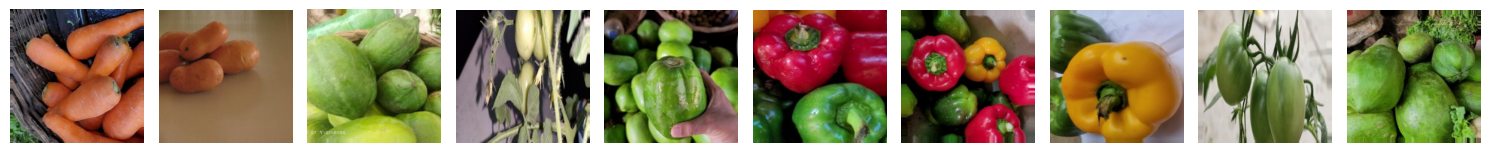

In [24]:
# Define a function to plot augmented images
def plot_augmented_images(generator, num_images=5):
    # Generate a batch of augmented images
    augmented_images, _ = next(generator)
    
    # Create a figure to plot the images
    plt.figure(figsize=(15, 10))
    
    # Plot the augmented images
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(augmented_images[i])
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

# Plot augmented images
plot_augmented_images(train_image_generator_augmented, num_images=10)

Then, we will be using the same model architecture and training as the base model to observe the effects of data augmentation to the accuracy and loss of the model.

In [14]:
# Building the Model Architecture
model_augmented = Sequential()

model_augmented.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model_augmented.add(MaxPooling2D(pool_size=(2, 2)))

model_augmented.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_augmented.add(MaxPooling2D(pool_size=(2, 2)))

model_augmented.add(Flatten())
model_augmented.add(Dense(1024, activation='relu'))
model_augmented.add(Dense(128, activation='relu'))
model_augmented.add(Dense(15, activation='softmax'))

model_augmented.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │   191,104,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191,256,527 (729.59 MB)

 Trainable params: 191,256,527 (729.59 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile the model
model_augmented.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


history = model_augmented.fit(train_image_generator, 
                 epochs=20, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch=15000//64, 
                 validation_steps=3000//64, 
)
model_augmented

Epoch 1/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.3600 - loss: 2.0310 - val_accuracy: 0.7232 - val_loss: 0.8902
Epoch 2/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7344 - loss: 0.4700 - val_accuracy: 0.7143 - val_loss: 0.3978
Epoch 3/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 476s 2s/step - accuracy: 0.8089 - loss: 0.6387 - val_accuracy: 0.8234 - val_loss: 0.5681
Epoch 4/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8438 - loss: 0.2444 - val_accuracy: 0.8214 - val_loss: 0.3496
Epoch 5/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 353s 1s/step - accuracy: 0.8910 - loss: 0.3829 - val_accuracy: 0.8845 - val_loss: 0.3829
Epoch 6/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.9531 - loss: 0.0951 - val_accuracy: 0.8036 - val_loss: 0.2260
Epoch 7/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.9426 - loss: 0.2318 - val_accuracy: 0.9059 - val_loss: 0.3112
Epoch 8/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 0.9219 - loss: 0.1356 - val_accu

We save the model

In [16]:
model_augmented.save("model_augmented.keras")

We evaluate the model by observing the train-val loss and accuracy, as well as creating a classification report for the test set.

We can see that the result is relatively the same as before, with a slight overfitting issues as the training accuracy is higher than the validation and test accuracy. We can see that there is a gap at the last epoch in the train-val loss graph, indicating an overfit model. We can also see that the accuracy slightly decreased for both the validation and test test. 

From those findings, we decide to temper with the model architecture to further improve the model while also keeping the data augmentation.



In [ ]:
results_train_func = model_augmented.evaluate(train_image_generator, verbose=0)
print('train_acc', results_train_func[1])
print('train_loss', results_train_func[0])

results_val_func = model_augmented.evaluate(val_image_generator, verbose=0)
print('val_acc', results_val_func[1])
print('val_loss', results_val_func[0])

results_test_func = model_augmented.evaluate(test_image_generator, verbose=0)
print('test_acc', results_test_func[1])
print('test_loss', results_test_func[0])

train_acc 0.9971333146095276
train_loss 0.02193756029009819
val_acc 0.9346666932106018
val_loss 0.23780392110347748
test_acc 0.9316666722297668
test_loss 0.23317821323871613


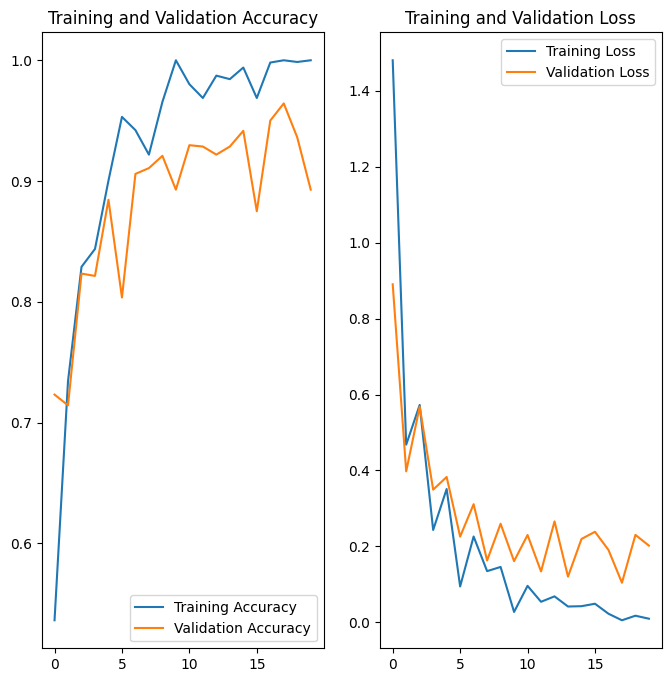

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
class_names = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Get predictions from the model using the test image generator
predictions = model_augmented.predict(test_image_generator)

# Convert predictions from one-hot encoded format to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the test image generator
true_labels = test_image_generator.classes

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print the classification report
print(report)


47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step
              precision    recall  f1-score   support

        Bean       0.90      0.93      0.91       200
Bitter_Gourd       0.99      0.92      0.95       200
Bottle_Gourd       0.96      0.97      0.96       200
     Brinjal       0.98      0.91      0.94       200
    Broccoli       0.93      0.91      0.92       200
     Cabbage       0.80      0.95      0.87       200
    Capsicum       0.93      0.99      0.96       200
      Carrot       0.99      1.00      0.99       200
 Cauliflower       0.93      0.85      0.89       200
    Cucumber       0.92      0.95      0.93       200
      Papaya       0.91      0.99      0.95       200
      Potato       1.00      0.94      0.97       200
     Pumpkin       0.87      0.93      0.90       200
      Radish       0.94      0.98      0.96       200
      Tomato       0.99      0.76      0.86       200

    accuracy                           0.93      3000
   macro avg       0.94      0.93     

We tried to use the model to predict the test set and display 5 random result of those predicitions to ensure that the model is working properly.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


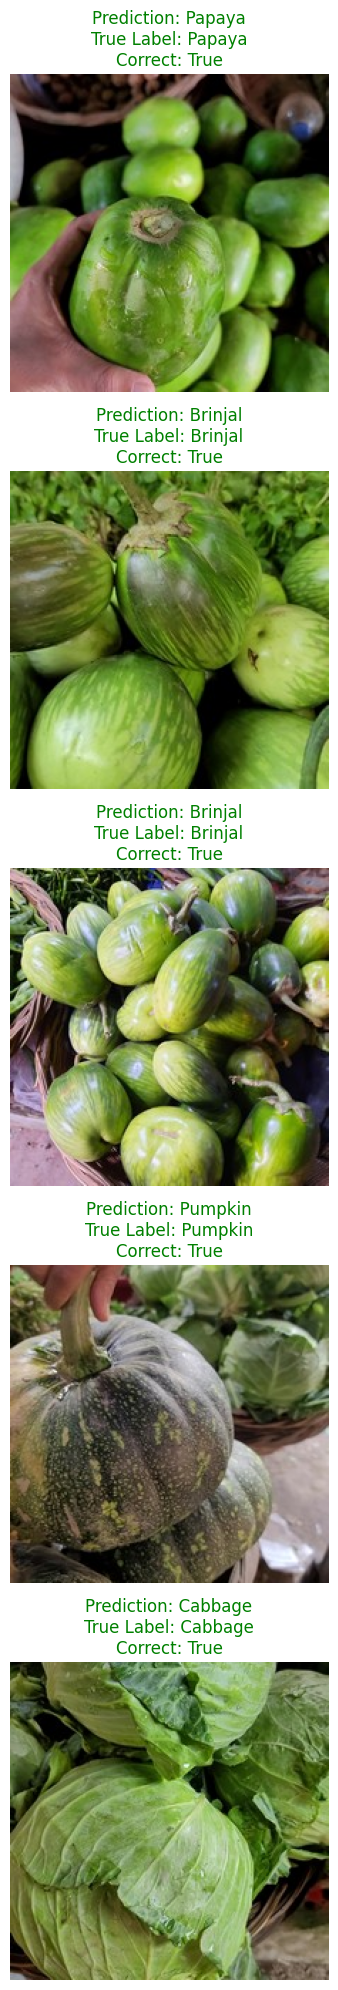

In [6]:
def predict_random(num_images=5):
    # Create subplots for displaying multiple images
    fig, axes = plt.subplots(num_images, 1, figsize=(6, 4*num_images))
    
    for i in range(num_images):
        # Randomly select a class from the available class names
        label = random.choice(class_names)

        # Get the path to the folder containing images for the selected class
        image_path = os.path.join(test_path, label)

        # Get a list of all images in the folder
        images_in_folder = os.listdir(image_path)

        # Randomly select an image from the list
        random_image = random.choice(images_in_folder)

        # Construct the full path to the randomly selected image
        image_path = os.path.join(image_path, random_image)

        # Load and preprocess the randomly selected image
        img_ = image.load_img(image_path, target_size=(224, 224))
        img_array = image.img_to_array(img_)
        img_processed = np.expand_dims(img_array, axis=0) 
        img_processed /= 255.   

        # Perform prediction using the model
        prediction = model_augmented.predict(img_processed)
        index = np.argmax(prediction)
        predicted_label = class_names[index]

        # Check if prediction is correct
        is_correct = (predicted_label == label)
        
        # Display the image and prediction result
        ax = axes[i]
        ax.imshow(img_array)
        ax.set_title(f"Prediction: {predicted_label}\nTrue Label: {label}\nCorrect: {is_correct}", color='green' if is_correct else 'red')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

predict_random(num_images=5)


## Improved Model Architecture

In this improved model, we kept the feature engineering parameters and the base model the same as before. However, we tried adding BatchNormalization after each maxpooling and also adding dropout after each hidden layers. In summary, Batch Normalization helps stabilize and accelerate training, while Dropout acts as a regularization technique to prevent overfitting and improve generalization. By incorporating both BatchNorm and Dropout layers into the model architecture, it is expected to create a model with better performance and robustness, as well as fixing the overfitting issues in the previous model.

In this project, we decided not to utilize padding and striding. Padding basically adds some extra space around the edges of our picture after each maxpooling so we do not lose any information. However, as we are dealing with a huge dataset and since we want to predict the types of vegetables, slight information loss is considered acceptable as one pixel worth of data will not alter the perception of that vegetable. It was not worth the time and memory constrains to add padding.

As for striding, it decides how big of a step our kernel takes as it moves across the image. If we use a bigger stride, our kernel jumps over more pixels at a time, covering more ground faster. This can make our analysis quicker but might make us miss some details in the image. If we use a smaller stride, our kernel moves more slowly and scrutinizes image details comprehensively, making our analysis more detailed but slower. The default stride is set to be (1,1), which is considered small. This compensante for the lack of padding, making the model analyze the details present in the image more thoroughly.

In [38]:
print("Train Data Improved: ",end=' ')
train_gen_improved = ImageDataGenerator(
                  rescale = 1./255,# Normalise the data
                  shear_range = 0.2,
                  zoom_range = 0.2,
                  horizontal_flip = True)

train_image_generator_improved = train_gen_improved.flow_from_directory(
                                            train_path,
                                            target_size=(224, 224),
                                            batch_size=64,
                                            class_mode='categorical',
                                            )

print("Validation Data: ",end=' ')
val_gen = ImageDataGenerator(rescale=1./255) 
val_image_generator = val_gen.flow_from_directory(
                                            val_path,
                                            target_size=(224, 224),
                                            batch_size=64,
                                            class_mode='categorical',
                                            )
print("Test Data: ",end=' ')
test_gen = ImageDataGenerator(rescale=1./255)
test_image_generator = val_gen.flow_from_directory(
                                            test_path,
                                            target_size=(224, 224),
                                            batch_size=64,
                                            class_mode='categorical',
                                            shuffle = False
                                            )

Train Data Improved:  Found 15000 images belonging to 15 classes.
Validation Data:  Found 3000 images belonging to 15 classes.
Test Data:  Found 3000 images belonging to 15 classes.


In [39]:
model_1 = Sequential()

model_1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(BatchNormalization())

model_1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(BatchNormalization())

model_1.add(Flatten())
model_1.add(Dense(1024, activation='relu'))
model_1.add(Dropout(0.2))  # Adding dropout for regularization
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))  # Adding dropout for regularization
model_1.add(Dense(15, activation='softmax'))

model_1.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │   191,104,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191,256,911 (729.59 MB)

 Trainable params: 191,256,719 (729.59 MB)

 Non-trainable params: 192 (768.00 B)

In [40]:
# Compile your model as usual
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train your model_1 
history_1 = model_1.fit(train_image_generator_improved, 
                 epochs=20, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch=15000//64, 
                 validation_steps=3000//64, 
)


Epoch 1/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 301s 1s/step - accuracy: 0.5206 - loss: 3.2430 - val_accuracy: 0.0771 - val_loss: 5.8108
Epoch 2/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7812 - loss: 0.2917 - val_accuracy: 0.1250 - val_loss: 2.5395
Epoch 3/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 291s 1s/step - accuracy: 0.7654 - loss: 0.9535 - val_accuracy: 0.4141 - val_loss: 2.7270
Epoch 4/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - accuracy: 0.8281 - loss: 0.5736 - val_accuracy: 0.4107 - val_loss: 1.2005
Epoch 5/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - accuracy: 0.8436 - loss: 0.6034 - val_accuracy: 0.8825 - val_loss: 0.4524
Epoch 6/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - accuracy: 0.8281 - loss: 0.2744 - val_accuracy: 0.8393 - val_loss: 0.2408
Epoch 7/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 290s 1s/step - accuracy: 0.8800 - loss: 0.4500 - val_accuracy: 0.9246 - val_loss: 0.3090
Epoch 8/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - accuracy: 0.9219 - loss: 0.1088 - val_ac

We save the model again

In [41]:
model_1.save("model_improved.keras")

The evaluation results indicate promising improvements in the model's generalization and robustness. The slight decrease in training accuracy to 0.96 suggests that the model is less prone to overfitting, indicating that it is not fitting the training data too closely, leading to better generalization. Despite this decrease, the validation and test accuracies remained consistent at 0.94 and 0.93 respectively, indicating that the model performs consistently well on unseen data, demonstrating its ability to generalize effectively.

Furthermore, the smaller gap between training and validation accuracies signifies a reduction in overfitting compared to the base model. This narrowing gap suggests that the model's performance on unseen data is closer to its performance on the training data, resulting in a more reliable and stable model. The near-identical loss values for both training and validation sets at the last epoch further support the notion of a well-fitted model. This convergence of loss values suggests that the model has effectively learned the underlying patterns in the data without overfitting.

Despite the slight decrease in test accuracy from 0.95 to 0.94, the negligible trade-off in accuracy is outweighed by the significant improvement in the model's overall fit. The enhanced model demonstrates superior generalization and robustness, as evidenced by its consistent performance across multiple evaluation metrics. In summary, the improved model architecture, characterized by the incorporation of BatchNorm and Dropout layers, along with thoughtful considerations regarding padding and striding, has resulted in a more stable, robust, and well-generalized model.

In [21]:
results_train_func = model_1.evaluate(train_image_generator, verbose=0)
print('train_acc', results_train_func[1])
print('train_loss', results_train_func[0])

results_val_func = model_1.evaluate(val_image_generator, verbose=0)
print('val_acc', results_val_func[1])
print('val_loss', results_val_func[0])

results_test_func = model_1.evaluate(test_image_generator, verbose=0)
print('test_acc', results_test_func[1])
print('test_loss', results_test_func[0])

train_acc 0.9664000272750854
train_loss 0.1870865523815155
val_acc 0.9403333067893982
val_loss 0.407743364572525
test_acc 0.9393333196640015
test_loss 0.3617907464504242


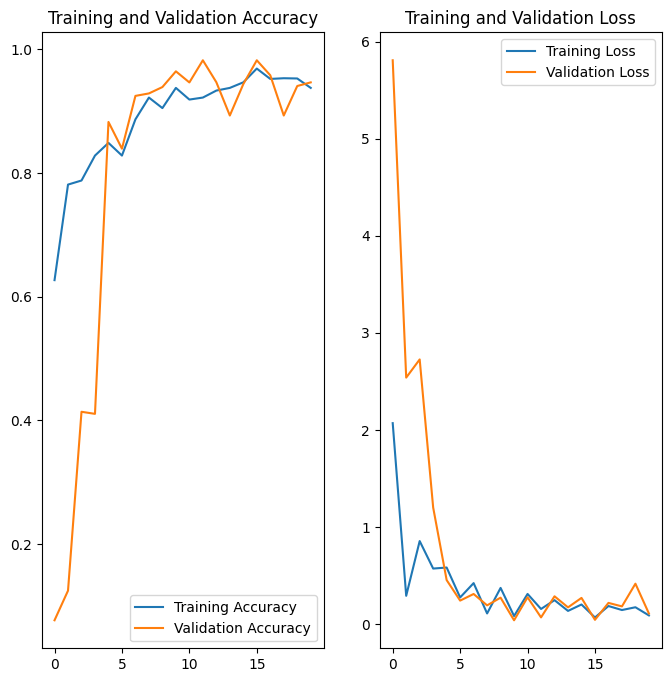

In [42]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [43]:
from sklearn.metrics import classification_report

class_names = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Get predictions from the model_1 using the test image generator
predictions = model_1.predict(test_image_generator)

# Convert predictions from one-hot encoded format to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the test image generator
true_labels = test_image_generator.classes

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print the classification report
print(report)


47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step
              precision    recall  f1-score   support

        Bean       0.97      0.70      0.81       200
Bitter_Gourd       0.77      0.98      0.86       200
Bottle_Gourd       0.95      1.00      0.98       200
     Brinjal       0.98      0.92      0.95       200
    Broccoli       0.82      0.98      0.89       200
     Cabbage       0.93      0.95      0.94       200
    Capsicum       0.99      0.98      0.99       200
      Carrot       1.00      1.00      1.00       200
 Cauliflower       0.95      0.83      0.89       200
    Cucumber       0.95      0.96      0.96       200
      Papaya       1.00      0.96      0.98       200
      Potato       0.99      0.97      0.98       200
     Pumpkin       0.98      0.94      0.96       200
      Radish       0.93      0.99      0.96       200
      Tomato       0.96      0.92      0.94       200

    accuracy                           0.94      3000
   macro avg       0.95      0.94     

We tried to predict the test set again using the new model, showing that the model is working properly.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


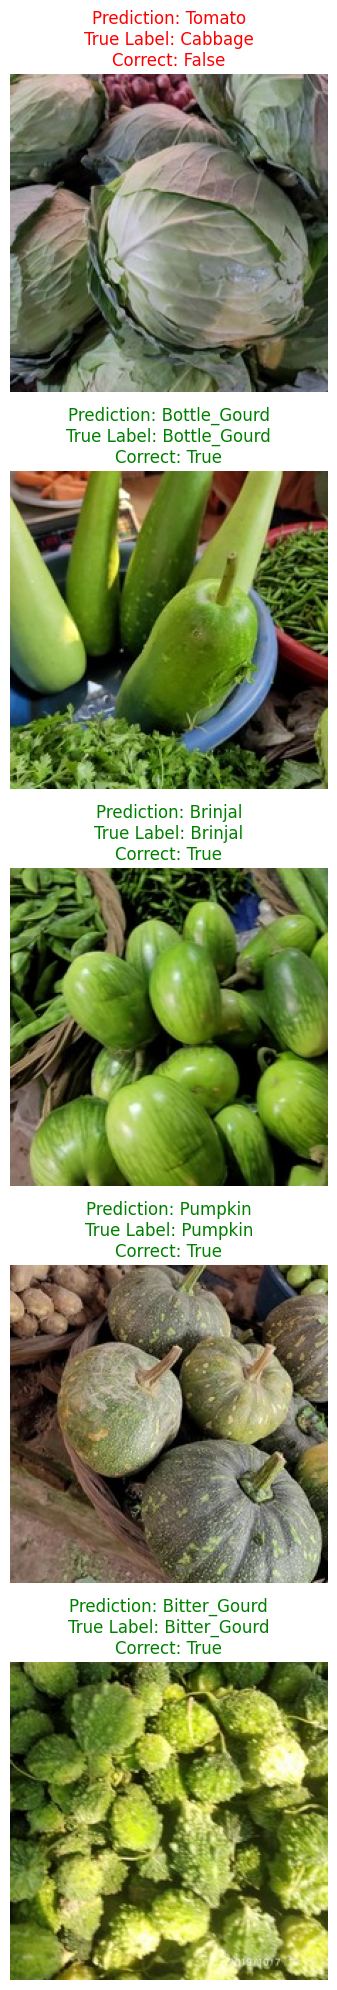

In [44]:
def predict_random(num_images=5):
    # Create subplots for displaying multiple images
    fig, axes = plt.subplots(num_images, 1, figsize=(6, 4*num_images))
    
    for i in range(num_images):
        # Randomly select a class from the available class names
        label = random.choice(class_names)

        # Get the path to the folder containing images for the selected class
        image_path = os.path.join(test_path, label)

        # Get a list of all images in the folder
        images_in_folder = os.listdir(image_path)

        # Randomly select an image from the list
        random_image = random.choice(images_in_folder)

        # Construct the full path to the randomly selected image
        image_path = os.path.join(image_path, random_image)

        # Load and preprocess the randomly selected image
        img_ = image.load_img(image_path, target_size=(224, 224))
        img_array = image.img_to_array(img_)
        img_processed = np.expand_dims(img_array, axis=0) 
        img_processed /= 255.   

        # Perform prediction using the model
        prediction = model_1.predict(img_processed)
        index = np.argmax(prediction)
        predicted_label = class_names[index]

        # Check if prediction is correct
        is_correct = (predicted_label == label)
        
        # Display the image and prediction result
        ax = axes[i]
        ax.imshow(img_array)
        ax.set_title(f"Prediction: {predicted_label}\nTrue Label: {label}\nCorrect: {is_correct}", color='green' if is_correct else 'red')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

predict_random(num_images=5)


# Model Saving

As the best model tested in this project is shown to be the improved model, we will use the `model_1.save("model_improved.keras")` as our final model for data inference and deployment

In [ ]:
model_1.save("model_improved.keras")

# Conclusion

## EDA Conclusion

1. The dataset contains 15000 images for train set, 3000 images for validation set, and 3000 images for train set
2. There are 15 classes of vegetable
3. The data is perfectly balanced, 1000 images per vegetable class in the train set
4. The image size is 224x224 pixels and the color channel is 3 (RGB)
5. Overall images have the picture taken from the default orientation where the image is displayed upright with the top of the image at the top of the viewing area.

## Overal Analysis


The objective of this project is to develop a convolutional neural network (CNN) model capable of accurately predicting various types of vegetables based on input images. Initially, the dataset will be loaded directly as train, validation, and test sets, followed by an in-depth exploratory data analysis. This analysis will involve visualizations and an examination of the image characteristics. Subsequently, a CNN model architecture will be constructed, incorporating convolutional layers, pooling layers, and fully connected layers, utilizing default parameters and no feature engineering as the baseline model. The models will undergo training and evaluation using metrics such as accuracy and loss. Following the initial model development, efforts will be made to enhance the model's performance. This will involve the construction and training of two additional models, one with the addition of data augmentation using the same model architecture as the base model and one with the incorporation of data augmentation, as well as batch normalization and dropout layers within the model architecture. These enhancements aim to optimize the model's performance and improve its ability to generalize to unseen data.

The result showed that both the first (base) model and second (with the addition of data augmentation) resulted in a good accuracy across training, validation, and test set. However, the training accuracy is bigger compared to the others, indicating overfitting issues. Fortunately, the overfitting issue was adressed succesfully in the third model with the help of batch normalization and dropouts. The final model combines techniques for both improving training stability (BatchNorm) and preventing overfitting (Dropout) while making thoughtful decisions regarding computational efficiency (no padding) and analysis detail (small stride). 

We can still improve the model thrugh regular monitoring of model performance, feedback collection from users, experimenting with another model architecture or augmentation, using transfer learning, and updating the model with a new dataset. We can also take it one stop forwards to create a model that can predict the vegetable quality as well by analyzing bruishes or discoloration, ensuring that only high-quality products reach consumers

**Strength:** The improved CNN model is shown to have amazing accuracy and good fit

**Weakness:** The training process is time and resource consuming as the dataset is relatively large and the total of three models were constructed for this project.

## Business Insights

The CNN model for vegetable recognition offers transformative benefits across multiple facets of the retail and supply chain industries:

1. Retail Optimization: Implementing the vegetable classification model in grocery stores or supermarkets enhances the shopping experience by providing accurate and efficient product categorization. This enables retailers to organize shelves more effectively, improve product discovery for customers, and optimize store layouts based on popular vegetable categories. Substantial cost savings and heightened operational efficiency.

2. Streamlined Supply Chain Operations: Integrating the model into supply chain management systems revolutionizes inventory tracking and logistics operations. Automated vegetable identification at every supply chain stage, including harvesting, packaging, and distribution, enhances traceability, reduces errors, and guarantees timely product delivery to retailers and consumers. The outcome is a seamless and agile supply chain network.

3. Enhanced Retail Experience: In retail environments, the model elevates the shopping experience by delivering precise and efficient product categorization. With shelves organized more effectively and popular vegetable categories optimized, retailers can effortlessly guide customers to their desired items, fostering enhanced product discovery and a more engaging shopping journey. The result is increased customer satisfaction and loyalty.

In conlusion, by using this model, businesses unlock unprecedented efficiency gains, operational excellence, and customer-centric retail experiences. From optimized inventory management to seamless supply chain operations and enhanced retail environments, the impact is transformative, driving profitability and competitive advantage in today's dynamic marketplace. The improved model architecture integrates BatchNormalization and Dropout layers for enhanced performance and robustness in which the adjustments aim to optimize model performance while considering computational constraints and dataset specifics.